### Pre-talk notes for Speaker!
During talk:
* Zoom in
* Clear cells
* Share Binder - https://mybinder.org/v2/gh/UKDataServiceOpen/working-with-twitter-data/HEAD?urlpath=%2Fdoc%2Ftree%2FRedditPreprocessing.ipynb

Talk time - TODO

# Reddit Preprocessing
This notebook will cover the exploration, tidying up and some basic analysis of the data collected by the [Reddit Scraping Demo in this repo](https://github.com/UKDataServiceOpen/working-with-twitter-data/blob/main/Reddit-Scrape-Demo.ipynb)

We will be using specific Ghana-related posts on reddit.

Alternatively, there is also a dataset of the top 100 posts on the [/r/Ghana Subreddit](https://old.reddit.com/r/ghana/) comprising of almost 8000 comments.

You can find this data [here](https://github.com/UKDataServiceOpen/working-with-twitter-data/tree/main/data)

So let's import some packages and read it in. 

In [1]:
import pandas as pd # Our data manipulation library
import numpy as np # Support for matrices, and other table-like shapes

In [2]:
# You may need to install these
# !pip3 install matplotlib
# !pip3 install seaborn

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Change the default style to be bigger, and clearer colored.
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.size': 28,
    'figure.figsize':(28,12)
})

# set seaborn style
sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale=1.5)

# Create a cool UK Data Service color palette for our plots
colors = ['#C71024', '#F4CA15', '#00673D', '#000000']
palette = sns.color_palette(colors)

In [4]:
# Read our data into a dataframe using pandas
data = pd.read_csv('data/multi_post_reddit_comments.csv')

# The head function prints out the first 5 rows.
data.head()

,url,post_id,post_title,author,score,created_utc,body
0,https://old.reddit.com/r/ghana/comments/18b74n...,18b74n9,I would love to visit Ghana. What should I know?,AutoModerator,1,2023-12-05 08:00:46,Thanks OP for your submission. This sub is hea...
1,https://old.reddit.com/r/ghana/comments/18b74n...,18b74n9,I would love to visit Ghana. What should I know?,OG_rafiki,21,2023-12-05 08:33:14,Travelling here between June - September means...
2,https://old.reddit.com/r/ghana/comments/18b74n...,18b74n9,I would love to visit Ghana. What should I know?,steepcurve,10,2023-12-05 08:55:53,If you go to pub/club. Keep count on your drin...
3,https://old.reddit.com/r/ghana/comments/18b74n...,18b74n9,I would love to visit Ghana. What should I know?,Adorable_Rub_8257,8,2023-12-07 22:46:28,Reading all the comments here got me smiling. ...
4,https://old.reddit.com/r/ghana/comments/18b74n...,18b74n9,I would love to visit Ghana. What should I know?,MyRockMyRefuge,3,2023-12-05 08:52:48,It’s great to hear you want to visit Ghana. Th...


Taking the post_id from here and putting it into the reddit URL as `reddit.com/{post_id}` will take us to the post each comment came from.

So we've got our data read in successfully, let's print out some of the reddit comments to see if they are Ghana-related.

In [5]:
for index in [1,2,3,4,5]:
    print(data['body'][index])
    print('\n')

Travelling here between June - September means you'll meet pretty mild weather. Pack enough comfortable tshirts and shorts to accommodate for multiple changes a day. Don't stay in Accra throughout your visit.   Go to :  -Akosombo (see the Volta lake and multiple riverfront villas) -Tamale (Bole national park and Paga crocodile pond if possible in the upper east) -then Kumasi on your way back (Lake Bosomtwe, Kumasi royal museum)  The local cuisine isn't bad. Keep an open mind.  Not too sure about travel requirements. Best you reach out to the embassy or use a travel company just to be safe


If you go to pub/club. Keep count on your drinks. Always make sure you know the price of the drinks you order.  Server will always add few extra drinks to your bill to pocket the difference.  Always ask for the price first. If you won't, they will always jack up the price.


Reading all the comments here got me smiling. I am Ghanaian (currently in the university of Ghana (in Accra) as a graduate stu

## Initial Thoughts

In [6]:
# I always recommend running info() for basic type information.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   url          797 non-null    object
 1   post_id      797 non-null    object
 2   post_title   797 non-null    object
 3   author       695 non-null    object
 4   score        797 non-null    int64 
 5   created_utc  797 non-null    object
 6   body         797 non-null    object
dtypes: int64(1), object(6)
memory usage: 43.7+ KB


In [7]:
# and decribe() for statistical info.
# data.describe()
# Or to supress scientific notation
data[['score']].describe().apply(lambda s: s.apply('{0:.0f}'.format))

,score
count,797
mean,12
std,57
min,-37
25%,1
50%,2
75%,6
max,1007


In [8]:
# Get number of comments on each post
data['post_title'].value_counts().head(20)

post_title
Tell me something interesting about Ghana.                           526
Ghana is a gorgeous, safe, and diverse country. Highly recommend!    229
I would love to visit Ghana. What should I know?                      42
Name: count, dtype: int64

In [9]:
# Get most popular authors of comments (check for bots or moderation)
data['author'].value_counts().head(20)

author
BassLB                  24
bogmire                 15
Mister_Pidibibbi        15
ThePikol                10
I_Just_Cant_Stand_It     8
Tyl3rt                   7
redzin                   7
Wolfman1961              7
Alone_Interest_700       6
Mesmorino                6
Imagine_Wagons02         6
Siggi_Starduust          5
pfazadep                 5
RazzmatazzLanky7923      5
Zmeiovich                5
Tediously                4
arioandy                 4
atrophic                 4
greengiant89             4
mainwasser               4
Name: count, dtype: int64

In [10]:
# Get highest upvoted comments
top_5_rows = data.nlargest(5, 'score')

for idx, row in top_5_rows.iterrows():
    print(f"Score: {row['score']}")
    print(f"Body: {row['body']}\n")


Score: 1007
Body: Ghana is considered rather a "success story" in African terms.  Ever since Jerry Rawlings voluntarily gave up power to his successor about 30 years ago, there has not been a coup which forcibly removed someone who was duly elected.

Score: 582
Body: That lake you see is the largest artificial lake in the world. The creation of the dam flooded 4% of the whole country     EDIT: BIGGEST then, 3000 sq km bigger than Lake Kariba

Score: 571
Body: Ghana shares no land with the former Ghana Empire. It is entirely outside of its former lands that were under the influence of the Ghana Empire

Score: 476
Body: Ghana produces a significant portion of the worlds cocoa beans. It is the second largest exporter of cocoa, after its neighbor Côte d’Ivoire.  Anytime you eat chocolate, think of Ghana, since there’s a strong chance some of it came from there!

Score: 412
Body: For an African country, it is the epitome of stable.



In [11]:
bottom_5_rows = data.nsmallest(5, 'score')

for idx, row in bottom_5_rows.iterrows():
    print(f"Score: {row['score']}")
    print(f"Body: {row['body']}\n")


Score: -37
Body: [deleted]

Score: -20
Body: [deleted]

Score: -18
Body: [deleted]

Score: -18
Body: I actually think Ghana is a beautiful place but it's undeniably unsafe, the murder rate is insane

Score: -16
Body: I just don't think you have a reason to be uncomfortable lol



## Initial thoughts on data
So at this point it looks like there is a good variety of data. I'm seeing a sentiment that Ghana is "stable" and the comments from these tourism posts are full of friendly recommendations. Downvoted comments claim the opposite, with an unbacked claim that the murder rate is high.

We can't conflate upvotes/downvotes with postivity or negativity though. Reddit comments are lifted by similar beliefs. I broad assumption is that upvoted comments represent larger groups and we could weight these comments as such. But I won't!

A useful tidy up stage here, is removing any duplicate comments. Bots, Moderators etc may post the same message over and over. Considering we are looking at things like "common words" this could swing our data.



In [12]:
data['body'].value_counts()

body
[deleted]                                                                                                                          7
Black tape                                                                                                                         3
[removed]                                                                                                                          3
Lake Kariba is bigger by volume but not surface area.                                                                              2
I can still see him watch his goalie catch the penalty before going in the lockerroom. That joy and pride.                         1
                                                                                                                                  ..
I’m Ghana have to pass on this one—don’t know much about the place.                                                                1
In Ghana a lot of children are enslaved to grow cocoa plants for

We have a choice to make here. We could simply drop all duplicated messages. This could remove meaningful repeated protest comments however. Admin comments like [deleted]/[removed] represent comments no longer present. These would ruin a visualisation, while they may be interesting.

In [13]:
# Keep only rows where the comment is unique.
data = data[data['body'].duplicated(keep=False) == False]

### Auto Mod
A common reddit bot, auto moderator also exists and should be removed.

In [14]:
data[data['author'] == 'AutoModerator']

,url,post_id,post_title,author,score,created_utc,body
0,https://old.reddit.com/r/ghana/comments/18b74n...,18b74n9,I would love to visit Ghana. What should I know?,AutoModerator,1,2023-12-05 08:00:46,Thanks OP for your submission. This sub is hea...


In [15]:
# remove all comments by AutoMod
data = data[data['author'] != 'AutoModerator']

## Text Processing
At this point we have explored, lightly, and tidied up some common issues in Reddit data. Now we need to go a level deeper.

A useful initial metric, is just most commonly used words. This can help us form a meaningful hypothesis. "What is the public perception of Ghana?", "How does food from Ghana rate online, compared to other places in Africa?". Your hunch on common words in the subreddit might be Ghana, Famous dishes or tourist attractions.

Let's follow this hunch by starting with Sentiment analysis

## Sentiment Analysis

In [16]:
# !pip3 install nltk

In [17]:
# The first run of this takes some time.
# Import NLTK, the Natural Language package
import nltk
# Download the popular vader lexicon of words and sentiments.
nltk.download([
    "vader_lexicon",
])

# import the sentiment analyser.
from nltk.sentiment import SentimentIntensityAnalyzer

# Create a new sentiment analyser.
sia = SentimentIntensityAnalyzer()

# And write a function we can pass to our pandas function
def get_sentiment(string):
    return sia.polarity_scores(string)['compound']

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/joe/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
# Test our sentiment package
get_sentiment('I love cats')

0.6369

In [19]:
# Test our sentiment package
get_sentiment('I hate cats')

-0.5719

In [20]:
# Test our sentiment package
get_sentiment('I am cats')

0.0

In [21]:
# sentiment by word demo function
def sentiment_by_word(string):
    for word in string.split(' '):
        print(word + ' -- ' + str(get_sentiment(word)))

sentiment_by_word('I love cats')

I -- 0.0
love -- 0.6369
cats -- 0.0


So let's apply this to a more detailed comment from our real data.

"Ghana is considered rather a "success story" in African terms.  Ever since Jerry Rawlings voluntarily gave up power to his successor about 30 years ago, there has not been a coup which forcibly removed someone who was duly elected."

In [22]:
comment = 'Ghana is considered rather a "success story" in African terms.  Ever since Jerry Rawlings voluntarily gave up power to his successor about 30 years ago, there has not been a coup which forcibly removed someone who was duly elected.'
get_sentiment(comment)

0.6808

In [23]:
# And lets see how that sentiment is calculated
sentiment_by_word(comment)

Ghana -- 0.0
is -- 0.0
considered -- 0.0
rather -- 0.0
a -- 0.0
"success -- 0.5719
story" -- 0.0
in -- 0.0
African -- 0.0
terms. -- 0.0
 -- 0.0
Ever -- 0.0
since -- 0.0
Jerry -- 0.0
Rawlings -- 0.0
voluntarily -- 0.0
gave -- 0.0
up -- 0.0
power -- 0.0
to -- 0.0
his -- 0.0
successor -- 0.2263
about -- 0.0
30 -- 0.0
years -- 0.0
ago, -- 0.0
there -- 0.0
has -- 0.0
not -- 0.0
been -- 0.0
a -- 0.0
coup -- 0.0
which -- 0.0
forcibly -- 0.0
removed -- 0.0
someone -- 0.0
who -- 0.0
was -- 0.0
duly -- 0.0
elected. -- 0.0


In [24]:
# So let's apply this to our entire dataframe
data['sentiment'] = data['body'].apply(get_sentiment)

# print a few rows
data.head()

,url,post_id,post_title,author,score,created_utc,body,sentiment
1,https://old.reddit.com/r/ghana/comments/18b74n...,18b74n9,I would love to visit Ghana. What should I know?,OG_rafiki,21,2023-12-05 08:33:14,Travelling here between June - September means...,0.9391
2,https://old.reddit.com/r/ghana/comments/18b74n...,18b74n9,I would love to visit Ghana. What should I know?,steepcurve,10,2023-12-05 08:55:53,If you go to pub/club. Keep count on your drin...,0.3182
3,https://old.reddit.com/r/ghana/comments/18b74n...,18b74n9,I would love to visit Ghana. What should I know?,Adorable_Rub_8257,8,2023-12-07 22:46:28,Reading all the comments here got me smiling. ...,0.9863
4,https://old.reddit.com/r/ghana/comments/18b74n...,18b74n9,I would love to visit Ghana. What should I know?,MyRockMyRefuge,3,2023-12-05 08:52:48,It’s great to hear you want to visit Ghana. Th...,0.8834
5,https://old.reddit.com/r/ghana/comments/18b74n...,18b74n9,I would love to visit Ghana. What should I know?,PurpleDelaena,5,2023-12-06 10:06:36,I don't know much about the friend you met on ...,0.5236


In [25]:
# Top sentiment comments

# Sort data by sentiment, highest first
data_sorted = data.sort_values(by='sentiment', ascending=False)

# Print body and sentiment for top 5 comments
for index, row in data_sorted.head(5).iterrows():
    print(f"Sentiment: {row['sentiment']}")
    print(f"Body: {row['body']}\n")

Sentiment: 0.9955
Body: I did a voluntary social year in Ghana (these things are controversial so I understand if you dislike my POV).  I had a great time and I learned a lot. Lived in a village with a ghanaian family and very quickly integrated which was absolutely awesome. My knowledge on things like history is not too expansive but I do have a bunch of personal experiences and small random things I learned so if you have a question I can answer some stuff about people and culture :D  Until then, here are some random thoughts:  Food is great. Some I didn‘t like, some I loved. Waakye and Kenkey were fucking amazing and I miss that taste every single day.  Travel is fun. The most utilized form of public transit is the Trotro, minibusses or large vans that drive along a route and either pick people up on their way or load up at a local station, something like a bus hub. Trotros are very fun mostly and one cool thing is that at large intersections or stops, market ladies and men will wai

In [26]:
# Sort data by sentiment, lowest first
# Print body and sentiment for top 5 comments
for index, row in data_sorted.tail(5).iterrows():
    print(f"Sentiment: {row['sentiment']}")
    print(f"Body: {row['body']}\n")

Sentiment: -0.9186
Body: Fuck Ghana.  "Same-sex sexual acts between males are illegal in Ghana, and LGBT rights are heavily suppressed. The majority of Ghana's population hold anti-LGBT sentiments. Physical and violent homophobic attacks against LGBT people are common, and are often encouraged by the media and religious and political leaders. At times, government officials, such as police, engage in such acts of violence. Reports of young gay people being kicked out of their homes are also common, as well as reports of conversion therapy occurring across Ghana."

Sentiment: -0.9331
Body: those countries may not be keeping super accurate crime statistics.    What makes you think that violent crime is higher in those countries though?

Sentiment: -0.9384
Body: I will say the biggest difference between chicago and joburg:  the armed burglary is about a million times worse in joburg.  You don't have well to do suburbs of chicago getting broken into by dudes with automatic weapons.  That's 

## Sentiment Visualisation
So these comments are detailed, and helpful for forming a question. But we can't answer right now "Do most users write about ghana in a positive or negative view?"

Let's answer that.

<Axes: >

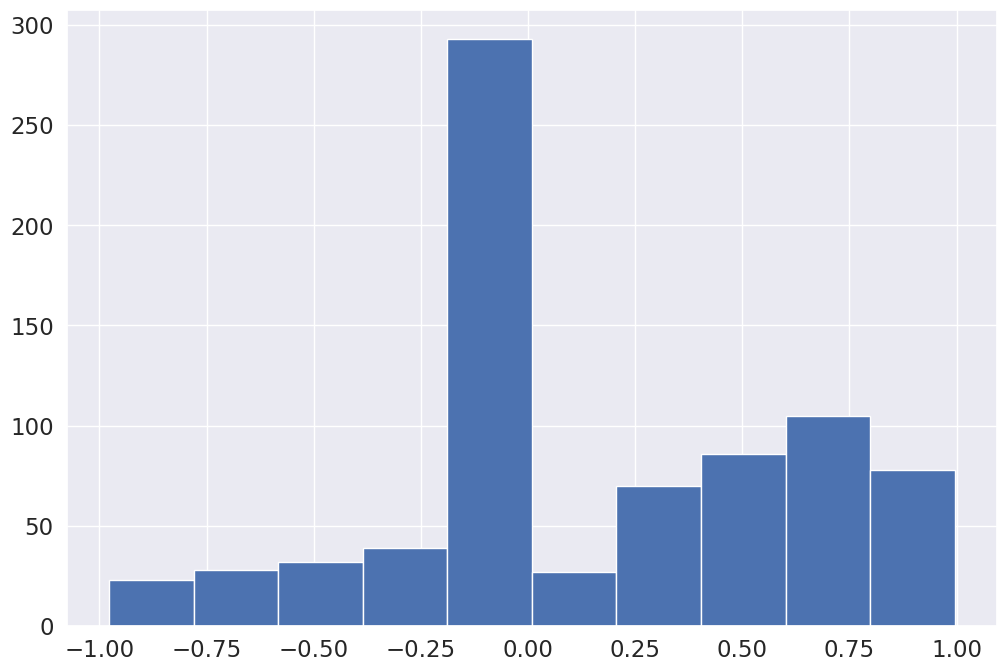

In [27]:
# Often the users at each end of this spectrum are quite different, lets see what our tweeters look like in general
data.sentiment.hist()

Most users post with a neutral sentiment. As we have seen any words this dictionary doesn't understand will be given neutral sentiment. So historic facts, dish names, etc will all fall at neutral sentiment.

We then have a negative-skewed set of positive comments. That is that, on average postiive comments are overwhlmingly positive.
Next, of the negative comments, we have the same distribution. Most negative comments tend to be almost neutral.

I'd expect we would find this in most online communities. Most people want to celebrate where they live, as long as there is no obvious large-scale political issue, war or crisis ongoing.

Who are the people in these groups? What are their purposes?

In [28]:
data.head()

,url,post_id,post_title,author,score,created_utc,body,sentiment
1,https://old.reddit.com/r/ghana/comments/18b74n...,18b74n9,I would love to visit Ghana. What should I know?,OG_rafiki,21,2023-12-05 08:33:14,Travelling here between June - September means...,0.9391
2,https://old.reddit.com/r/ghana/comments/18b74n...,18b74n9,I would love to visit Ghana. What should I know?,steepcurve,10,2023-12-05 08:55:53,If you go to pub/club. Keep count on your drin...,0.3182
3,https://old.reddit.com/r/ghana/comments/18b74n...,18b74n9,I would love to visit Ghana. What should I know?,Adorable_Rub_8257,8,2023-12-07 22:46:28,Reading all the comments here got me smiling. ...,0.9863
4,https://old.reddit.com/r/ghana/comments/18b74n...,18b74n9,I would love to visit Ghana. What should I know?,MyRockMyRefuge,3,2023-12-05 08:52:48,It’s great to hear you want to visit Ghana. Th...,0.8834
5,https://old.reddit.com/r/ghana/comments/18b74n...,18b74n9,I would love to visit Ghana. What should I know?,PurpleDelaena,5,2023-12-06 10:06:36,I don't know much about the friend you met on ...,0.5236


In [29]:
# Check correlation
corr = data[['score','sentiment']].corr()
corr.style.background_gradient(cmap ='coolwarm')

,score,sentiment
score,1.000000,0.079110
sentiment,0.079110,1.000000


There is almost no correlation between the score a comment gets, and the sentiment of the message. This is likely weighted by the neutrality of most comments but it does suggest popular content doesn't necessarily have to be positive.

# Text processing & Wordclouds
Now we've explored the data, let's tidy up the sentences themselves and see if we can do better.

In [30]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /home/joe/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [31]:
# split text by whitespace
wordlist = data['body'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(wordlist)
word_dist = nltk.FreqDist(words)
wordCount = pd.DataFrame(word_dist.most_common(),
                    columns=['Word', 'Frequency'])

In [32]:
# What are our top 10 words?
wordCount.head(10)

,Word,Frequency
0,.,957
1,the,686
2,",",631
3,a,462
4,to,409
5,I,394
6,and,369
7,of,365
8,in,344
9,is,323


/tmp/ipykernel_2962/2462498493.py:1: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=wordCount.head(10), y= wordCount.head(10).Word, x = wordCount.head(10).Frequency, palette=palette, hue='Word', legend=False)


<Axes: xlabel='Frequency', ylabel='Word'>

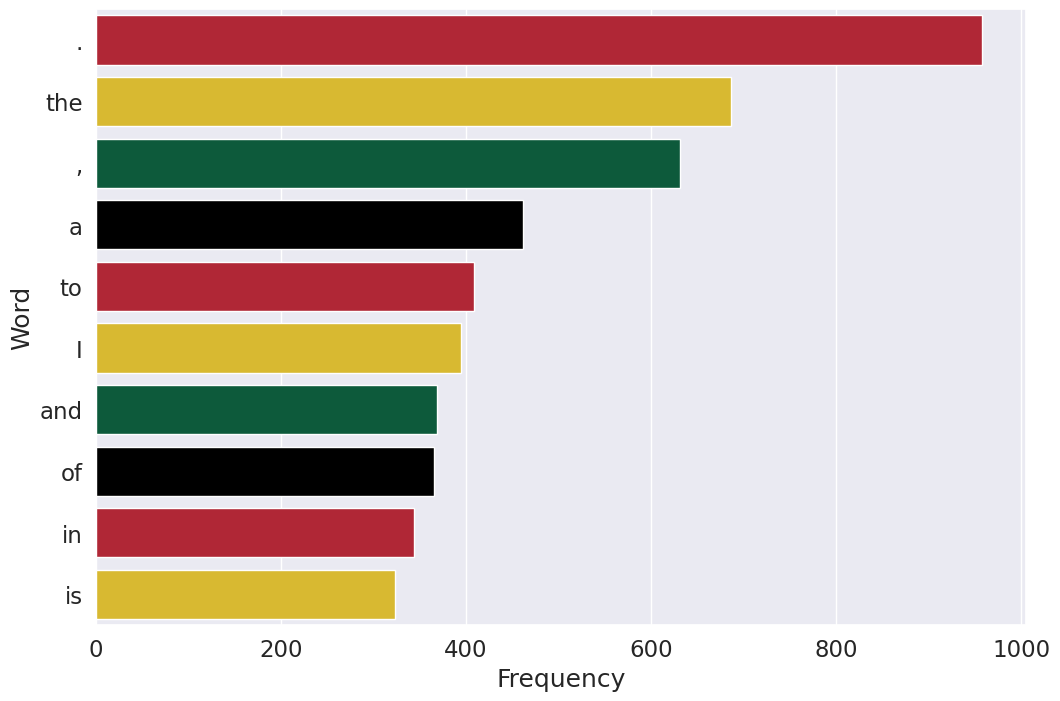

In [33]:
sns.barplot(data=wordCount.head(10), y= wordCount.head(10).Word, x = wordCount.head(10).Frequency, palette=palette, hue='Word', legend=False)

## Text processing - Stop words
We've hit our first problem. While we assumed popular words would be useful like "Ghana", "Museum", "food" etc. We have instead found a load of "stop words". In early text analysis these tokens would be considered useless. More modern natural language processing techniques wouldn't disregard these but we shall. Let's drop punctuation for now.

In [34]:
# split text by whitespace
wordlist = data['body'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(wordlist)

# remove non alphanumeric characters
new_words= [word for word in words if word.isalnum()]

word_dist = nltk.FreqDist(new_words)
wordCount = pd.DataFrame(word_dist.most_common(),
                    columns=['Word', 'Frequency'])

In [35]:
# What are our top ten words, without non alphanumeric characters
wordCount.head(10)

,Word,Frequency
0,the,686
1,a,462
2,to,409
3,I,394
4,and,369
5,of,365
6,in,344
7,is,323
8,it,284
9,you,262


/tmp/ipykernel_2962/2462498493.py:1: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=wordCount.head(10), y= wordCount.head(10).Word, x = wordCount.head(10).Frequency, palette=palette, hue='Word', legend=False)


<Axes: xlabel='Frequency', ylabel='Word'>

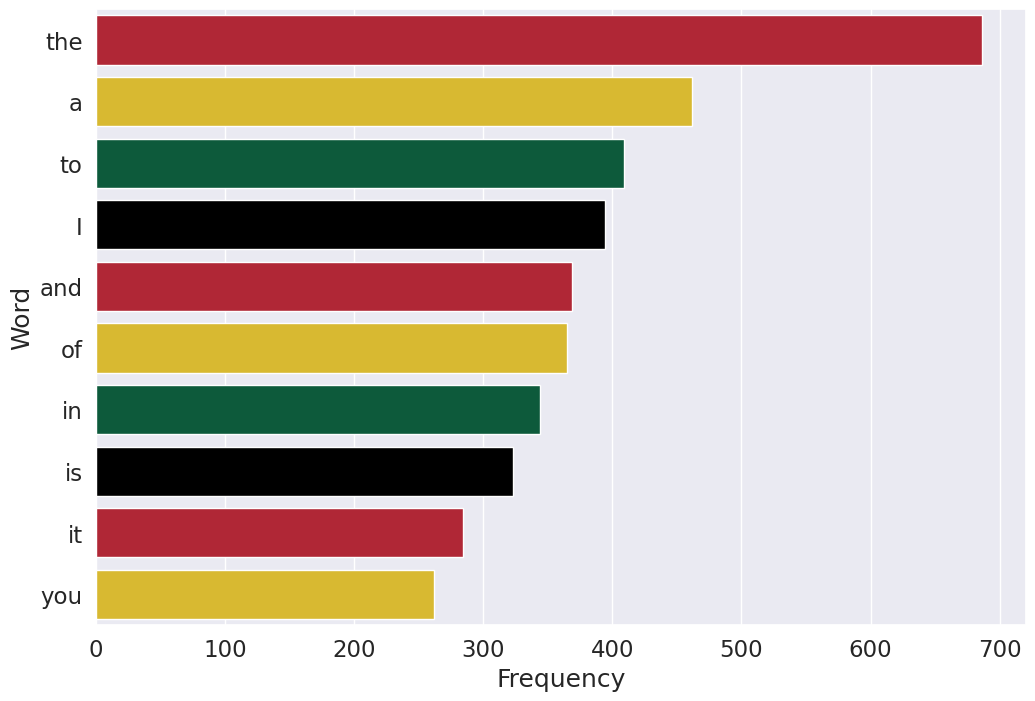

In [36]:
sns.barplot(data=wordCount.head(10), y= wordCount.head(10).Word, x = wordCount.head(10).Frequency, palette=palette, hue='Word', legend=False)

In [37]:
# stopwords are the words that add 'nothing' to a sentence, let's remove them. NLTK can help here.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/joe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
# import and print stop words for demos sake
from nltk.corpus import stopwords
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [39]:
# split text by whitespace
wordlist = data['body'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(wordlist)

# remove non alphanumeric characters
new_words= [word for word in words if word.isalnum()]

# remove stop words
stop_words = set(stopwords.words('english'))
filtered_new_words = [w for w in new_words if not w.lower() in stop_words]

word_dist = nltk.FreqDist(filtered_new_words)
wordCount = pd.DataFrame(word_dist.most_common(),
                    columns=['Word', 'Frequency'])

In [40]:
# Log words without stop words
wordCount.head(10)

,Word,Frequency
0,Ghana,247
1,country,101
2,like,86
3,people,53
4,one,46
5,Africa,46
6,go,40
7,food,39
8,get,39
9,think,36


/tmp/ipykernel_2962/2462498493.py:1: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=wordCount.head(10), y= wordCount.head(10).Word, x = wordCount.head(10).Frequency, palette=palette, hue='Word', legend=False)


<Axes: xlabel='Frequency', ylabel='Word'>

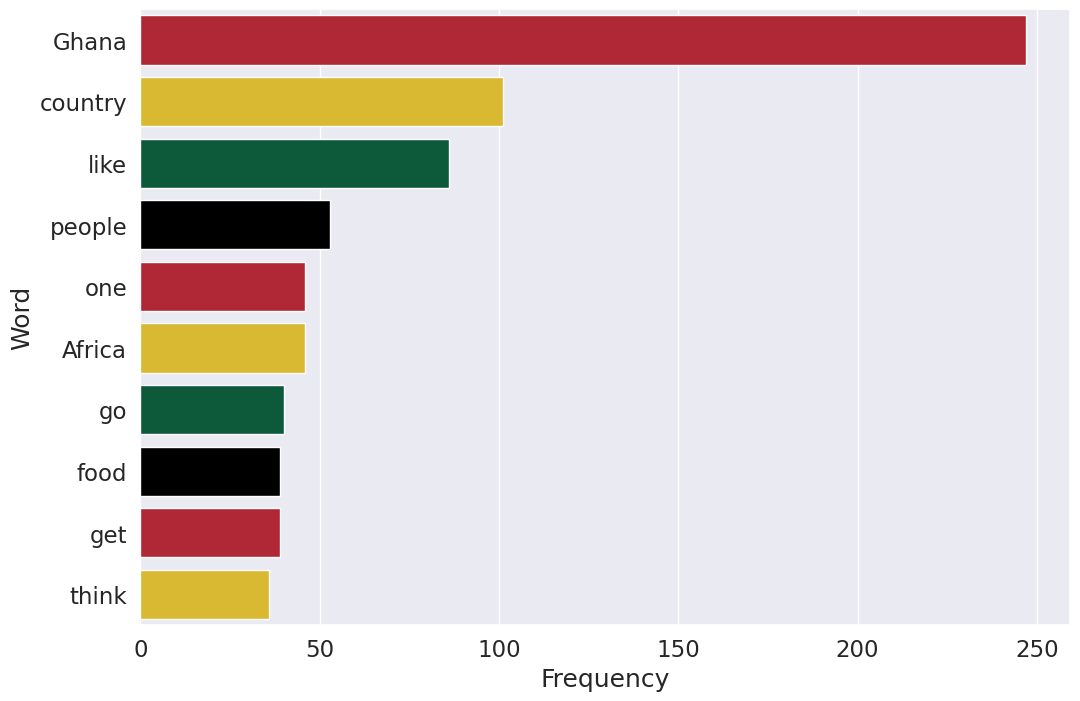

In [41]:
sns.barplot(data=wordCount.head(10), y= wordCount.head(10).Word, x = wordCount.head(10).Frequency, palette=palette, hue='Word', legend=False)

That looks almost exactly like my prediction! We can go one small step further because currently we aren't counting "Ghana" and "ghana" as the same word. This goes for every sentence starting word, which is currently supressed.

In [42]:
# split text by whitespace
# we add in a lower() function
wordlist = data['body'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(wordlist)

# remove non alphanumeric characters
new_words= [word for word in words if word.isalnum()]

# remove stop words
stop_words = set(stopwords.words('english'))
filtered_new_words = [w for w in new_words if not w.lower() in stop_words]

word_dist = nltk.FreqDist(filtered_new_words)
wordCount = pd.DataFrame(word_dist.most_common(),
                    columns=['Word', 'Frequency'])

In [43]:
# lowercase all words, to merge Cough and cough for example.
wordCount.head(20)

,Word,Frequency
0,ghana,275
1,country,101
2,like,91
3,people,56
4,one,55
5,africa,50
6,also,43
7,food,42
8,go,41
9,get,40


/tmp/ipykernel_2962/2462498493.py:1: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=wordCount.head(10), y= wordCount.head(10).Word, x = wordCount.head(10).Frequency, palette=palette, hue='Word', legend=False)


<Axes: xlabel='Frequency', ylabel='Word'>

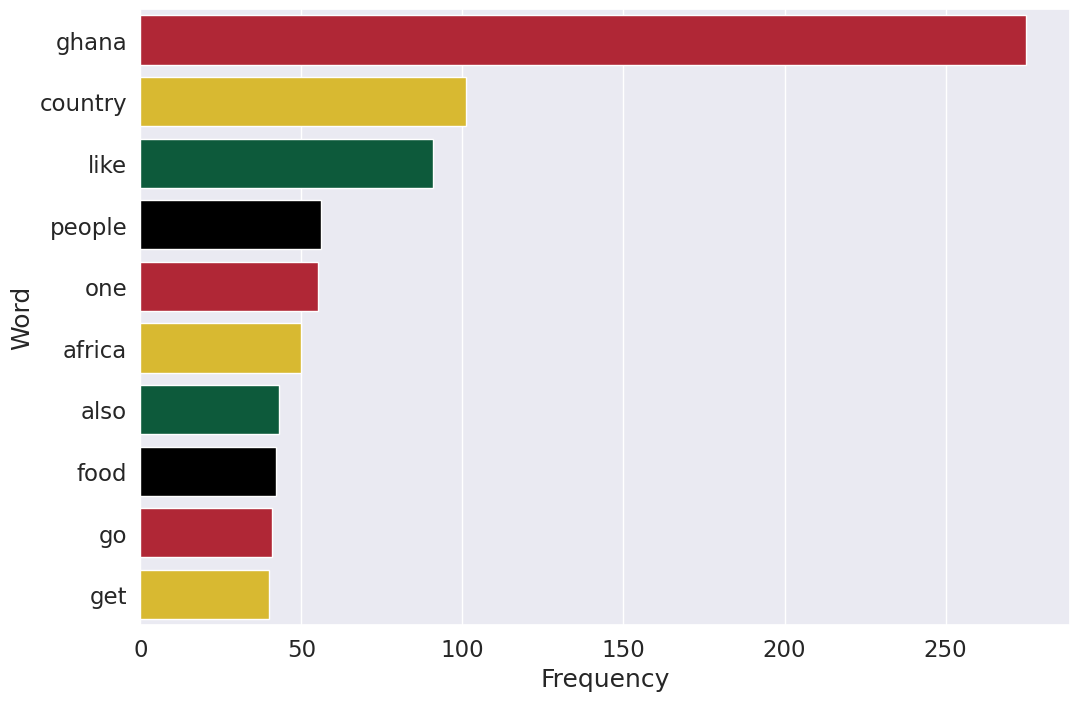

In [44]:
sns.barplot(data=wordCount.head(10), y= wordCount.head(10).Word, x = wordCount.head(10).Frequency, palette=palette, hue='Word', legend=False)

## Wordclouds
The above graph tells us some intersting things. Some topics we could zoom in on are "food", "people" for example. If we iterated here we could get all comments that mention food, and see what we find in there. Is a graph visualisation useful to you? Wordclouds are a really creative, and easy way to convert a frequency count into something you can share on social media.

We could re-run this same analysis, only for comments that mention food.

In [45]:
# Filter rows where 'body' contains 'food' (case-insensitive)
food_comments = data[data['body'].str.contains(r'\bfood\b', case=False, na=False)]

# Concatenate all these filtered comments into one big text
wordlist = food_comments['body'].str.cat(sep=' ')

# Tokenize
words = nltk.tokenize.word_tokenize(wordlist)

# Remove non-alphanumeric words
new_words = [word for word in words if word.isalnum()]

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_new_words = [w for w in new_words if w.lower() not in stop_words]

# Frequency distribution
word_dist = nltk.FreqDist(filtered_new_words)

# Create DataFrame with counts
wordCount = pd.DataFrame(word_dist.most_common(), columns=['Word', 'Frequency'])

print(wordCount.head(50))


          Word  Frequency
0         food         39
1         like         20
2        Ghana         17
3      country         17
4    countries         12
5       dishes         10
6       people          9
7         also          9
8        Coast          9
9        Ivory          9
10      things          8
11        many          8
12  experience          7
13         one          7
14        used          7
15       great          7
16      really          7
17     African          7
18        rice          7
19    Ghanaian          6
20       would          6
21         get          6
22         see          6
23        much          5
24       thing          5
25       large          5
26  definitely          5
27     amazing          5
28      Africa          5
29        said          4
30       whole          4
31         say          4
32         eat          4
33       local          4
34     someone          4
35        good          4
36      region          4
37      Fren

Now we are seeing mention of dishes, Ivory Coast, rice, eat, cocoa, fufu. More food related.

In [46]:
# prepare format wordcloud pacakge expects
bag = wordCount[['Word','Frequency']]
bag.col = ['words','counts']

d = {}
for a, x in bag.values:
    d[a] = x

/tmp/ipykernel_2962/3320041510.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  bag.col = ['words','counts']


In [47]:
# !pip3 install wordcloud
# !pip3 install Pillow

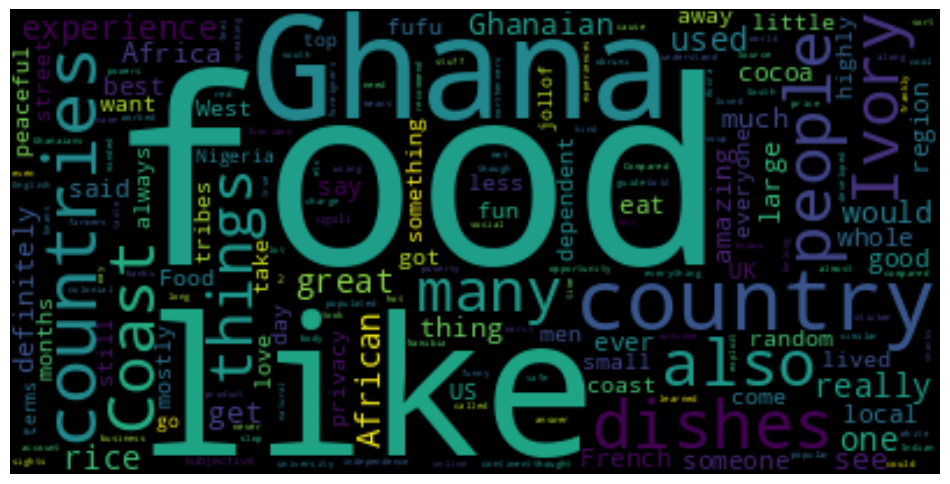

In [48]:
from wordcloud import WordCloud
from PIL import Image

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

That's the default wordcloud, let's tidy it up a bit. Let's make it more Ghana!

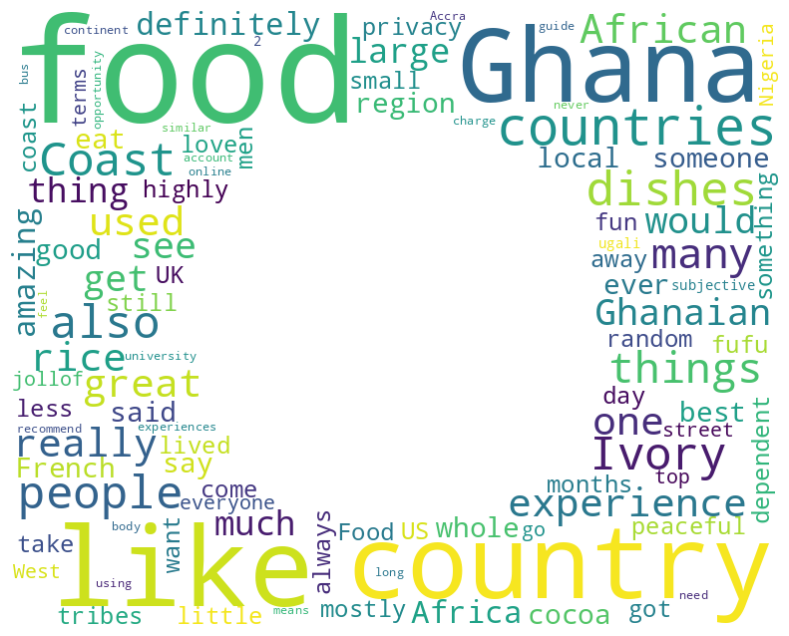

In [49]:
# We can use any image mask to change the shape to whatever we like
circleMask = np.array(Image.open("Wordcloud/circleMask.png"))

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(width=1000, height= 700, max_font_size=500, max_words=100, background_color="white", mask=circleMask).generate_from_frequencies(d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

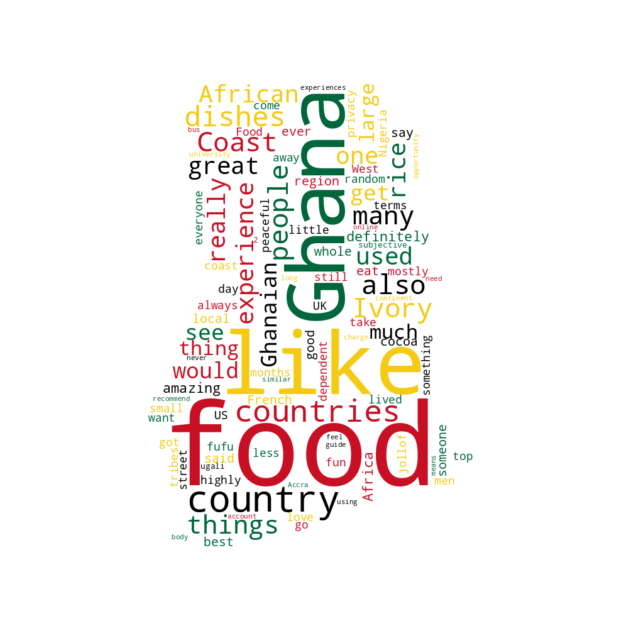

In [50]:
from itertools import cycle
palette = ['#C71024', '#F4CA15', '#00673D', '#000000']
color_cycle = cycle(palette)

# Function to pick the next color in the cycle
def palette_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return next(color_cycle)

# Load your mask
circleMask = np.array(Image.open("Wordcloud/GhanaMask.png"))

# Create the word cloud
wordcloud = WordCloud(
    width=1000,
    height=700,
    max_font_size=500,
    max_words=100,
    background_color="white",
    mask=circleMask
).generate_from_frequencies(d)

# Apply custom colors in round robin
plt.figure()
plt.imshow(wordcloud.recolor(color_func=palette_color_func), interpolation="bilinear")
plt.axis("off")
plt.show()

/home/joe/miniconda3/lib/python3.13/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


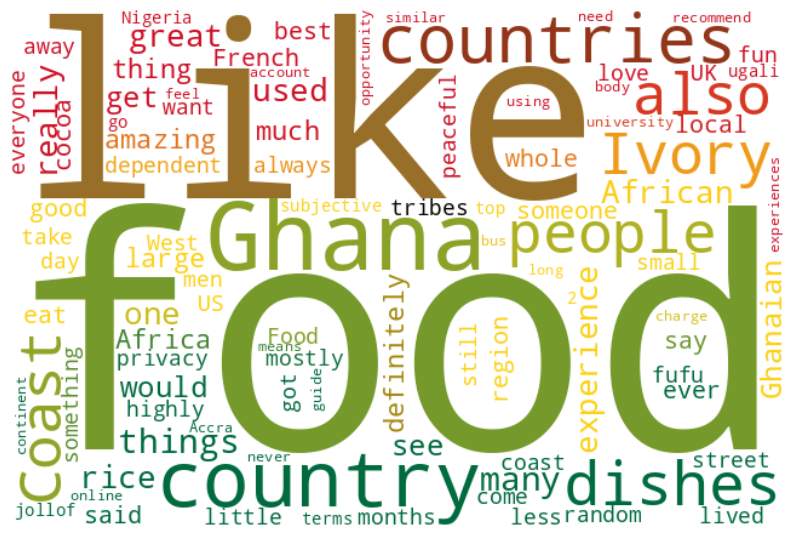

In [51]:
from wordcloud import WordCloud, ImageColorGenerator
# Load the image (used for both shape and colors)
flag_image = np.array(Image.open("Wordcloud/Flag.png").convert("RGB"))

# Generate the word cloud using the mask for shape
wordcloud = WordCloud(
    width=1000,
    height=700,
    max_font_size=500,
    max_words=100,
    background_color="white",
    mask=flag_image
).generate_from_frequencies(d)

# Create a color generator from the image
image_colors = ImageColorGenerator(flag_image)

# Display the word cloud recolored from the image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

In [52]:
# export frequencies for use on https://www.wordclouds.co.uk/

# Convert dictionary to DataFrame with correct header order
df = pd.DataFrame(list(d.items()), columns=["word", "weight"])[["weight", "word"]]

# Export to CSV
df.to_csv("frequencies.csv", index=False)

## Thanks
We will leave it there. There is a lot to cover here today so I hope you made it to the end. I realise this is extra technical too so remember this will be covered in an Excel version.